# AM2061 Algorithm 6-1
## Differential Equations - Eulers Method

Eulers Method is an Algorithm used to approximate how a Differential Equation changes over time. Let us define endpoints $a$ and $b$ such that the time-range $a \leq t \geq b$. Let $y(a) = \alpha$ and:

$$ f(t, y) = \frac{dy}{dt} = y'(t) $$

As in **Lecture 19**, we create a set of mesh-points in $t$ - approximating the solution $y(t)$ at each successive mesh-point. This is similar to the procedure as in Algorithm 5.1. We have a width $h$, and $N$ evenly spaced points for which $i = 0,1,2,...,N$:

$$ h = \frac{b - a}{N} $$
$$ t_i = a + ih $$

By applying a Taylor Expansion, and using the notation $w_i \approx y(t_i)$, we get $w_0 = \alpha$. We also find the following approximation (**Lecture 19**):

$$ w_{i+1} = w_i + h f\left( t_i, w_i \right) $$

A brief explanation is as follows:

* We are given the endpoints $a$ and $b$, the initial condition $\alpha$ and the number of steps $N$
* Find $h$, initialise $t$ and $w$
* Perform the above equation over all steps, updating $t$ at the same time

The following is the pseudocode provided:
    
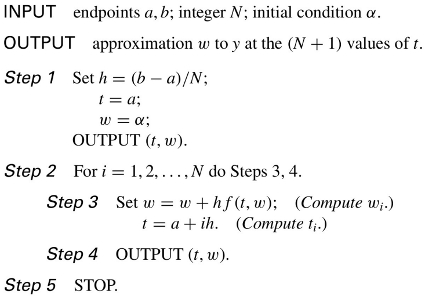

Let us now create this in Python.

First we must define a dataset to work with. I will use what was given in the Example in **Lecture 19**, where we have the following Differential Equation:

$$ \dot{y}= y - t^2 + 1 $$

With $t \in[0, 2]$ and $y(0) = 0.5$, let us choose $h = 0.05$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.05 # use this to set N

a = 0
b = 2
N = int((b - a) / h) # N must be an Integer
alpha = 0.5

f = lambda t, y: y - t**2 + 1 # lambda function of two variables

Now let us define the algorithm, we need to pass in the endpoints, initial condition, and number of steps.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
def EulerMethod(f, a, b, N, alpha):
    '''
    Usage:
        Approximates the solution to Differential Equations in a given range
    Inputs:
        f: Function used
        a: start-point
        b: end-point
        N: Number of Steps
        alpha: Initial Condition
    Outputs:
        t: array of time-values
        w: array of solutions at time-values
    '''
    # Initialise t and w arrays, +1 as we are not counting initial point as a step
    t = np.zeros([N + 1])
    w = np.zeros([N + 1])
    
    # Step 1
    h = (b - a) / N
    t[0] = a
    w[0] = alpha
    
    print("t    | w")
    print("{0:.2f} | {1:.4f}".format(t[0], w[0]))
    
    # Step 2
    for i in range(1, N + 1):
        # Step 3
        w[i] = w[i - 1] + h * f(t[i - 1], w[i - 1])
        t[i] = a + i * h
        # Step 4
        print("{0:.2f} | {1:.4f}".format(t[i], w[i]))
        
    # Step 5
    return (t, w)

We can now test this algorithm for a solution, which will be returned as a tuple $(t, w)$:

In [3]:
EulerMethod(f, a, b, N, alpha)

t    | w
0.00 | 0.5000
0.05 | 0.5750
0.10 | 0.6536
0.15 | 0.7358
0.20 | 0.8215
0.25 | 0.9105
0.30 | 1.0029
0.35 | 1.0986
0.40 | 1.1974
0.45 | 1.2993
0.50 | 1.4041
0.55 | 1.5118
0.60 | 1.6223
0.65 | 1.7354
0.70 | 1.8510
0.75 | 1.9691
0.80 | 2.0894
0.85 | 2.2119
0.90 | 2.3364
0.95 | 2.4627
1.00 | 2.5907
1.05 | 2.7202
1.10 | 2.8511
1.15 | 2.9832
1.20 | 3.1162
1.25 | 3.2500
1.30 | 3.3844
1.35 | 3.5191
1.40 | 3.6539
1.45 | 3.7886
1.50 | 3.9229
1.55 | 4.0566
1.60 | 4.1893
1.65 | 4.3207
1.70 | 4.4507
1.75 | 4.5787
1.80 | 4.7045
1.85 | 4.8277
1.90 | 4.9480
1.95 | 5.0649
2.00 | 5.1780


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 array([0.5       , 0.575     , 0.653625  , 0.73580625, 0.82147156,
        0.91054514, 1.0029474 , 1.09859477, 1.19739951, 1.29926948,
        1.40410796, 1.51181335, 1.62227902, 1.73539297, 1.85103762,
        1.9690895 , 2.08941898, 2.21188993, 2.33635942, 2.46267739,
        2.59068626, 2.72022058, 2.8511066 , 2.98316193, 3.11619503,
        3.25000478, 3.38438002, 3.51909902, 3.65392897, 3.78862542,
        3.92293169, 4.05657828, 4.18928219, 4.3207463 , 4.45065862,
        4.57869155, 4.70450113, 4.82772618, 4.94798749, 5.06488687,
        5.17800621]))

There is a modified Euler Method discussed in **Lab 09**, and other Runge-Kutta Methods soon.